# Functionality: visualization of ciCOH Hist

## Import Packages 

In [1]:
import os, sys
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt

from igraph.drawing.text import TextDrawer
import cairo

In [2]:
# import_nbmodule used for import package in .ipynb
import import_nbmodule

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)


# import animal_folder function in util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

# import graphVisual in connAnalyTool/graphVisual.pynb 
from connAnalyTool import graphVisual

importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/graphVisual.ipynb


## Preparasion

### exp subfolders & code_corresfolder

In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
nb_name = nb_name[0: nb_name.find('.ipynb')]

# corresfolder
corresfolder,correparentfolder = code_corresfolder(os.getcwd(), nb_name)

### global parameters

In [5]:
# frequency
freq = [26, 28]
strfreq = 'freq' + str(freq[0]) + '_' + str(freq[1])


# eventphase
event = 'rest'

In [6]:
### text setup for brain areas ###
texts_area = dict()

texts_area['VPLo'] = [20, 40, 20]

texts_area['VLo'] = [20, 120, 20]

texts_area['VA'] = [20, 200, 20]

texts_area['SMA'] = [20, 320, 20]

texts_area['M1'] = [20, 500, 20]

texts_area['STN'] = [280, 140, 20]

texts_area['GP'] = [360, 250, 20]

In [7]:
areas_unwanted = ['lCd','rMC']

In [8]:
halfs = True

### input setup

In [9]:
inputfolder = os.path.join(correparentfolder, 'm1_calcciCOH_rest')
filename =  'ciCOH_rest' + '_freq' + str(freq[0]) + '_' + str(freq[1])

if halfs:
    filename = filename + '_halfs'

file = os.path.join(inputfolder, filename + '.pickle')

### save setup

In [10]:
savefolder = corresfolder
savefile_prefix_origin = 'ciCOH_Hist' + '_' + strfreq 

if halfs:
    savefile_prefix_origin = savefile_prefix_origin + '_halfs'

## Load ciCOH and Channel

In [11]:
fp = open(file, 'rb')
ciCOH = pickle.load(fp)

In [13]:
# ciCOH
ciCOH_normal, ciCOH_mild, ciCOH_moderate = ciCOH['normal'], ciCOH['mild'], ciCOH['moderate']

# channel information
chnInf_recchni, chnInf_matchni = ciCOH['chnInf_recchni'], ciCOH['chnInf_matchni']
chnInf_brainarea, chnInf_coord = ciCOH['chnInf_brainarea'], ciCOH['chnInf_coord']

## Del unwanted channels

In [16]:
def unwanted_chandata_del(ciCOH, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord):
    
    chns_unwanted = []
    for area_unwanted in areas_unwanted:
        for i, area in enumerate(chnInf_brainarea):
            if area == area_unwanted:
                chns_unwanted.append(i)
    
    nchns = ciCOH.shape[0]
    ciCOH = np.delete(ciCOH, chns_unwanted, axis = 0)
    ciCOH = np.delete(ciCOH, chns_unwanted, axis = 1)
    
    
    chnInf_recchni = [i for j, i in enumerate(chnInf_recchni) if j not in chns_unwanted]
    chnInf_brainarea = [i for j, i in enumerate(chnInf_brainarea) if j not in chns_unwanted]
    chnInf_coord = [i for j, i in enumerate(chnInf_coord) if j not in chns_unwanted]

    return ciCOH, chnInf_recchni, chnInf_brainarea, chnInf_coord

In [17]:
ciCOH_normal, chnInf_recchni, chnInf_brainarea, chnInf_coord = \
        unwanted_chandata_del(ciCOH_normal, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)

ciCOH_mild, chnInf_recchni, chnInf_brainarea, chnInf_coord = \
        unwanted_chandata_del(ciCOH_mild, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)

ciCOH_moderate, chnInf_recchni, chnInf_brainarea, chnInf_coord = \
        unwanted_chandata_del(ciCOH_moderate, areas_unwanted, chnInf_recchni, chnInf_brainarea, chnInf_coord)


## Hist

In [18]:
lowweight = 0.2

### ciCOH hist 

<Figure size 432x288 with 0 Axes>

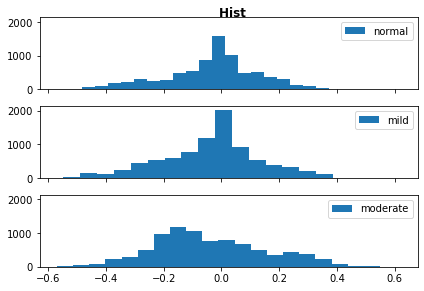

In [24]:
x_normal = np.reshape(ciCOH_normal, (-1))
x_mild = np.reshape(ciCOH_mild, (-1))
x_moderate = np.reshape(ciCOH_moderate, (-1))


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal, bins=n_bins, label = 'normal')
axs[1].hist(x_mild, bins=n_bins, label = 'mild')
axs[2].hist(x_moderate, bins=n_bins, label = 'moderate')


axs[0].legend()
axs[1].legend()
axs[2].legend()


title = 'Hist ' 
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))

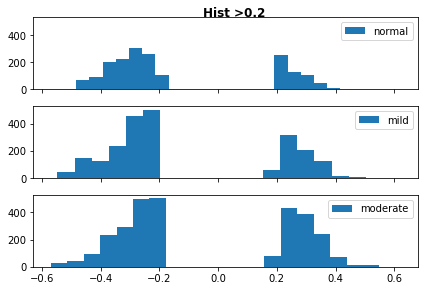

In [25]:
x_normal = np.reshape(ciCOH_normal, (-1))
x_mild = np.reshape(ciCOH_mild, (-1))
x_moderate = np.reshape(ciCOH_moderate, (-1))


x_normal = x_normal[abs(x_normal)>=lowweight]
x_mild = x_mild[abs(x_mild)>=lowweight]
x_moderate = x_moderate[abs(x_moderate)>=lowweight]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal, bins=n_bins, label = 'normal')
axs[1].hist(x_mild, bins=n_bins, label = 'mild')
axs[2].hist(x_moderate, bins=n_bins, label = 'moderate')


axs[0].legend()
axs[1].legend()
axs[2].legend()

title = 'Hist ' + '>' + str(lowweight)
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))

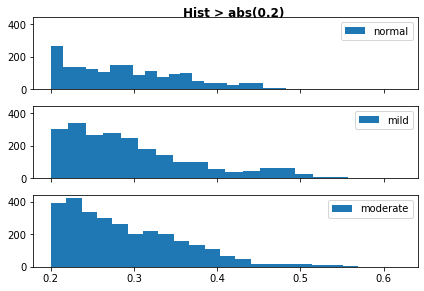

In [26]:
x_normal = np.reshape(abs(ciCOH_normal), (-1))
x_mild = np.reshape(abs(ciCOH_mild), (-1))
x_moderate = np.reshape(abs(ciCOH_moderate), (-1))


x_normal = x_normal[abs(x_normal)>=lowweight]
x_mild = x_mild[abs(x_mild)>=lowweight]
x_moderate = x_moderate[abs(x_moderate)>=lowweight]


n_bins = 20

fig, axs = plt.subplots(3, 1, tight_layout=True, sharex = True, sharey = True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x_normal, bins=n_bins, label = 'normal')
axs[1].hist(x_mild, bins=n_bins, label = 'mild')
axs[2].hist(x_moderate, bins=n_bins, label = 'moderate')


axs[0].legend()
axs[1].legend()
axs[2].legend()

title = 'Hist ' + '> abs(' + str(lowweight) + ')'
fig.suptitle(title, x = 0.55, y= 1,weight = 'bold')
plt.savefig(os.path.join(savefolder, savefile_prefix_origin + title + '.png'))